## Finite Difference For Elliptic Problems


### Example 1

Here we show how to solve the following elliptic ordinary differential equation:
$$\begin{cases}u'' = 0\\u(0)=0\;\;u(2)=2\end{cases}$$

using a finite difference scheme.

In [42]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
from math import exp
import numpy as np
from scipy.linalg import solve
def spmat2npmat(M):
    Mnp = np.eye(M.Height())
    for i in range(0,M.Width()):
        for j in range(0,M.Height()):
            Mnp[i,j]=M[i+1,j+1]
    return Mnp

We first define the geometry of the problem and create a mesh of uniform size 0.01,

In [2]:
I = line(0.0,2.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.4)

In [3]:
mesh

|1D Mesh|
Mesh made by 5.
0. [0.000000,0.400000]
1. [0.400000,0.800000]
2. [0.800000,1.200000]
3. [1.200000,1.600000]
4. [1.600000,2.000000]

In [4]:
mesh.getElNumber()

5

then define a mesh function that defines the boundary condition.

In [5]:
def nullf(P):
    return [0];
u0 = MeshFunction(mesh,1)
u0.pushFunction(nullf)

In [6]:
u0_vec = u0.vec_export()
u0_vec

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000)

(0.000000,0.000000,0.000000,0.000000,0.000000,2.000000)


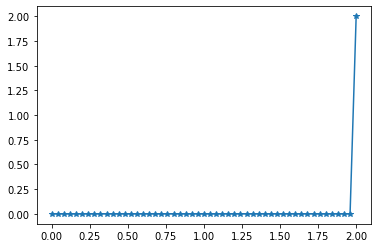

In [7]:
v0 = vec(u0_vec.len())
v0[1]=0.0;
v0[v0.len()]=2.0;
print(v0)
u0.vec_import(v0);
Draw(u0,mesh,0)

We now define the source term create some boundary condition with the mesh function previously generated:

In [8]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [0])
f_vec = f.vec_export()
f_vec

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000)

In [9]:
bc = BoundaryCondition("DIRICHLET",u0)
fbc = bc.apply(f_vec);
fbc

(0.000000,0.000000,0.000000,0.000000,0.000000,2.000000)

Last we define the finite difference scheme on the given mesh, and solve the problem:
$$A\vec{u} = \vec{f}$$

using Gauss-Seidel method.

In [10]:
FD = FiniteDifference(mesh)
print(FD.BoundaryOp(bc))

[0,(1,1)]->1.000000
[7,(2,2)]->0.000000
[14,(3,3)]->0.000000
[21,(4,4)]->0.000000
[28,(5,5)]->0.000000
[35,(6,6)]->1.000000



In [11]:
M = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
M

[0,(1,1)]->1.000000
[6,(2,1)]->6.250000
[7,(2,2)]->-12.500000
[8,(2,3)]->6.250000
[13,(3,2)]->6.250000
[14,(3,3)]->-12.500000
[15,(3,4)]->6.250000
[20,(4,3)]->6.250000
[21,(4,4)]->-12.500000
[22,(4,5)]->6.250000
[27,(5,4)]->6.250000
[28,(5,5)]->-12.500000
[29,(5,6)]->6.250000
[35,(6,6)]->1.000000

In [12]:
u_vec = GauBSeidel(M,fbc,v0,2000)
print(u_vec)
u = MeshFunction(mesh,1)
u.pushFunction(lambda p: [0])
u.vec_import(u_vec)

(-0.000000,0.400000,0.800000,1.200000,1.600000,2.000000)


In [13]:
print(u_vec)
u.eval([0.1],1)

(-0.000000,0.400000,0.800000,1.200000,1.600000,2.000000)


[0.0999999996394162]

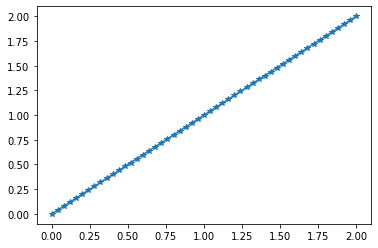

In [14]:
Draw(u,mesh,1)

(0.000000,0.400000,0.800000,1.200000,1.600000,2.000000)


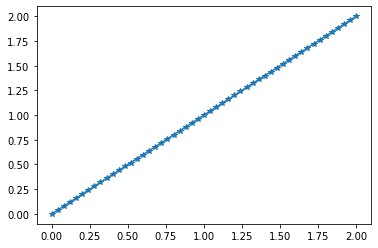

In [15]:
ue = MeshFunction(mesh,1);
ue.pushFunction(lambda p: [p[0]]);
print(ue.vec_export())
ue.eval([1.9],1)
Draw(ue,mesh,1)

In [47]:
def solveBVP(h):
    I = line(0.0,1.0)
    mesh = Mesh(1);
    mesh.UniformMesh(I,h)
    u0 = MeshFunction(mesh,1)
    u0.pushFunction(lambda p: [p[0]])
    u0_vec = u0.vec_export()
    v0 = vec(u0_vec.len())
    v0[1]=0.0;
    v0[v0.len()]=0.0;
    u0.vec_import(v0);
    f = MeshFunction(mesh,1)
    f.pushFunction(lambda p: [-(np.pi**2)*np.sin(np.pi*p[0])])
    f_vec = f.vec_export()
    bc = BoundaryCondition("DIRICHLET",u0)
    fbc = bc.apply(f_vec);
    FD = FiniteDifference(mesh)
    M = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
    uhnp = solve(spmat2npmat(M),np.array(fbc.to_Array()));
    uh_vec = vec(u0_vec.len())
    uh_vec.from_Array(uhnp)
    u = MeshFunction(mesh,1)
    u.pushFunction(lambda p: [np.sin(np.pi*p[0])])
    u_vec = u.vec_export()
    err = MeshFunction(mesh,1)
    err.pushFunction(lambda p: [0])
    err.vec_import(u_vec+(-1)*uh_vec)
    err_vec = err.vec_export()
    return err.norm(2);

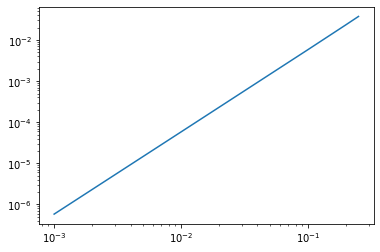

In [51]:
E = []
for h in [0.25,0.2,0.1,0.01,0.005,0.001]:
     E = E+[solveBVP(h)];
plt.loglog([0.25,0.2,0.1,0.01,0.005,0.001],E)

### Example 2
$$\begin{cases}-u'' + u = 0\\u(-1)=1\;\;u(1)=1\end{cases}$$

In [16]:
I = line(-1.0,1.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.1)

In [17]:
mesh

|1D Mesh|
Mesh made by 20.
0. [-1.000000,-0.900000]
1. [-0.900000,-0.800000]
2. [-0.800000,-0.700000]
3. [-0.700000,-0.600000]
4. [-0.600000,-0.500000]
5. [-0.500000,-0.400000]
6. [-0.400000,-0.300000]
7. [-0.300000,-0.200000]
8. [-0.200000,-0.100000]
9. [-0.100000,0.000000]
10. [0.000000,0.100000]
11. [0.100000,0.200000]
12. [0.200000,0.300000]
13. [0.300000,0.400000]
14. [0.400000,0.500000]
15. [0.500000,0.600000]
16. [0.600000,0.700000]
17. [0.700000,0.800000]
18. [0.800000,0.900000]
19. [0.900000,1.000000]

In [18]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda P: [0])
u0_vec = u0.vec_export()

(1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000)


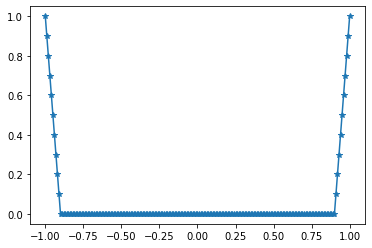

In [19]:
v0 = vec(u0_vec.len())
v0[1]=1.0;
v0[v0.len()]=1.0;
print(v0)
u0.vec_import(v0);
Draw(u0,mesh,1)

In [20]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [0])
f_vec = f.vec_export()
f_vec

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000)

In [21]:
bc = BoundaryCondition("DIRICHLET",u0)
fbc = bc.apply(f_vec);
fbc

(1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000)

In [22]:
FD = FiniteDifference(mesh)

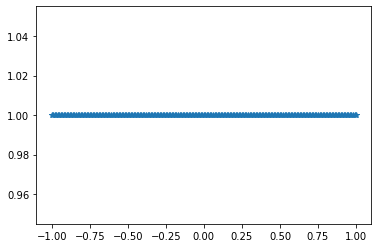

In [23]:
q = MeshFunction(mesh,1);
q.pushFunction(lambda p: [1])
Draw(q,mesh,1)

In [24]:
K1 = FD.ReactionOp(bc,q);
K2 = FD.LaplaceOp(bc);
K = K1+(-1.00)*K2+FD.BoundaryOp(bc);

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000)


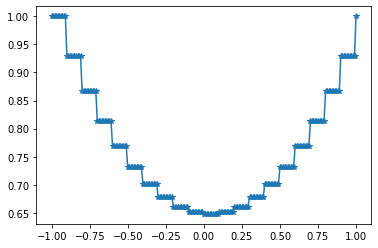

In [25]:
u = MeshFunction(mesh,1)
u.pushFunction(lambda p: [0])
u_vec = u.vec_export()
print(u_vec)
u_vec = Jacobi(K,fbc,fbc,2000)
u.vec_import(u_vec)
Draw(u,mesh,0)

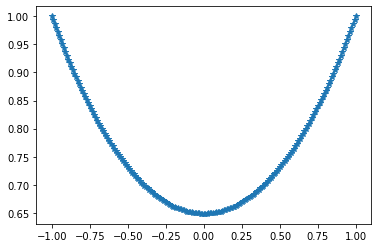

In [26]:
Draw(u,mesh,1)

(1.000000,0.928718,0.866730,0.813418,0.768246,0.730763,0.700594,0.677436,0.661059,0.651297,0.648054,0.651297,0.661059,0.677436,0.700594,0.730763,0.768246,0.813418,0.866730,0.928718,1.000000)


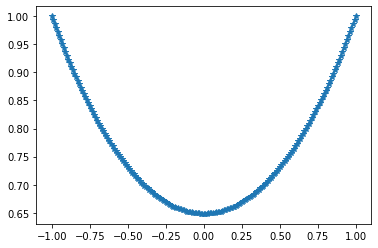

In [27]:
ue = MeshFunction(mesh,1);
ue.pushFunction(lambda p: [(1/(1+exp(2)))*(exp(1-p[0])+exp(p[0]+1))]);
print(ue.vec_export())
Draw(ue,mesh,1)

### Example 3
$$\begin{cases}-u'' + u' = 0\\u(0)=0\;\;u(1)=1\end{cases}$$

In [28]:
I = line(0.0,1.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.05)

In [29]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda P: [0])
u0_vec = u0.vec_export()

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000)


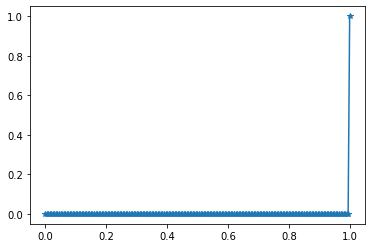

In [30]:
v0 = vec(u0_vec.len())
v0[1]=0.0;
v0[v0.len()]=1.0;
print(v0)
u0.vec_import(v0);
Draw(u0,mesh,0)

In [31]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [0])
f_vec = f.vec_export()
f_vec

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000)

In [32]:
bc = BoundaryCondition("DIRICHLET",u0)
fbc = bc.apply(f_vec);
fbc

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000)

In [33]:
FD = FiniteDifference(mesh)

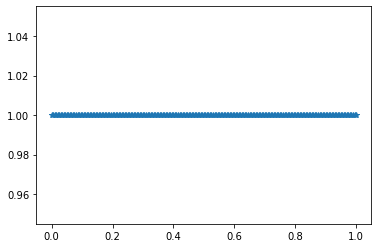

In [34]:
p = MeshFunction(mesh,1);
p.pushFunction(lambda p: [1])
Draw(p,mesh,1)

In [35]:
K1 = FD.LaplaceOp(bc);
K2 = FD.TransportOp(bc,p);
K = (-1.0)*K1+K2+FD.BoundaryOp(bc);

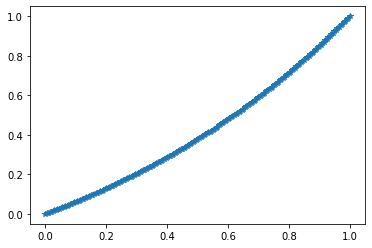

In [36]:
u = MeshFunction(mesh,1)
u.pushFunction(lambda p: [0])
u_vec = u.vec_export()
u_vec = GauBSeidel(K,fbc,fbc,10000)
u.vec_import(u_vec)
Draw(u,mesh,1)

(0.000000,0.029839,0.061207,0.094184,0.128851,0.165296,0.203610,0.243888,0.286231,0.330744,0.377541,0.426736,0.478454,0.532823,0.589980,0.650068,0.713236,0.779643,0.849455,0.922846,1.000000)


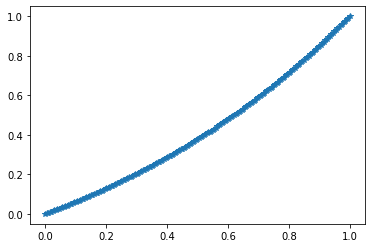

In [37]:
ue = MeshFunction(mesh,1);
ue.pushFunction(lambda p: [(1/(exp(1)-1))*(exp(p[0])-1)]);
print(ue.vec_export())
Draw(ue,mesh,1)

In [38]:
u_vec = u.vec_export()
ue_vec = ue.vec_export()
err = u_vec+(-1)*ue_vec;
err.norm(2)

8.13488056136852e-05

### Example - High order Finite Difference

0.052214582340229035
Error norm 2:  0.011675535552951217  Error norm inf: 0.012074529043739402


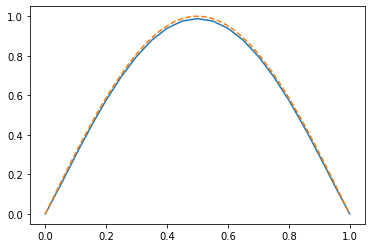

In [52]:
I = line(0.0,1.0)
h=0.05
mesh = Mesh(1);
mesh.UniformMesh(I,h)
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda p: [0*p[0]])
u0_vec = u0.vec_export()
v0 = vec(u0_vec.len())
v0[1]=0.0;
v0[v0.len()]=0.0;
u0.vec_import(v0)
bc = BoundaryCondition("DIRICHLET",u0)
HFD = HOFiniteDifference(mesh,3)
M=HFD.LaplaceOp(bc)+HFD.BoundaryOp(bc)
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [-(np.pi**2)*np.sin(np.pi*p[0])])
f_vec = f.vec_export()
fbc = bc.HOApply(f_vec,[(12*h**2)*np.sin(np.pi*(-2*h)),(12*h**2)*np.sin(np.pi*(1.0+2*h))])
uhnp = solve(spmat2npmat(M),np.array(fbc.to_Array()));
uh = MeshFunction(mesh,1)
uh.pushFunction(lambda p: [0])
uh_vec = uh.vec_export();
uh_vec.from_Array(list(uhnp))
uh.vec_import(uh_vec)
u = MeshFunction(mesh,1)
u.pushFunction(lambda p: [np.sin(np.pi*p[0])])
u_vec=u.vec_export()
Draw(uh,mesh,1,'-')
plt.plot(np.linspace(0,1,100),[np.sin(np.pi*x) for x in np.linspace(0,1,100)],'--')
err = MeshFunction(mesh,1)
err.pushFunction(lambda p: [0*p[0]])
err.vec_import((uh_vec+(-1)*u_vec))
print((uh_vec+(-1)*u_vec).norm(2))
print("Error norm 2: ",err.norm(2)," Error norm inf:",max([abs(e) for e in (uh_vec-u_vec).to_Array()[1:-1]]))